# Import important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset:
df = pd.read_csv("C:/Users/Acer/CodSoft/CSV_folder/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# 2. Exploratory Data Analysis (EDA):

In [3]:
# Checking Shape of dataframe:
df.shape

(200, 4)

In [4]:
# Checking columns name:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
# Checking data type of columns:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
# Checking for null values:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
# Checking duplicates in rows:
df.duplicated().sum()

0

In [8]:
# Checking descriptive statistics:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


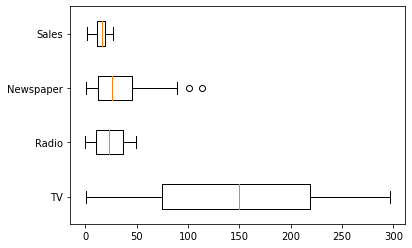

In [9]:
# Checking for outliers:
plt.boxplot(df,vert=False,data = df,labels=df.columns)
plt.show()

# 3. Separating Input Features and Target Column:

In [11]:
x = df.iloc[:,:-1]
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [12]:
y = df.iloc[:,-1:]
y.head()

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9


# 4. Train-Test-Split:

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
xtrain, xtest, ytrain, ytest  = train_test_split(x,y,test_size=0.3,random_state=42)


In [15]:
print(xtrain.shape)
print(ytrain.shape)

(140, 3)
(140, 1)


In [16]:
print(xtest.shape)
print(ytest.shape)

(60, 3)
(60, 1)


# 5. Linear Regression Algorithm:

In [17]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
model = LinearRegression()

In [18]:
model.fit(xtrain,ytrain)

LinearRegression()

In [19]:
ypred = model.predict(xtest)
ypred[10]

array([8.97584663])

In [20]:
model.score(xtrain,ytrain)*100

89.19647339302077

In [21]:
model.score(xtest,ytest)*100

90.914843418498


# 6. Evaluation of Algorithm:

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [24]:
mean_squared_error(ytest,ypred)

2.541624036229149

In [25]:
mean_absolute_error(ytest,ypred)

1.1594875061090588

In [26]:
r2_score(ytest,ypred)*100

90.914843418498

In [27]:
rmse = np.sqrt(mean_squared_error(ytest,ypred))
rmse

1.5942471691143594

# 7. Hyper-parameter Tuning:

In [28]:
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold

In [29]:
cv = KFold(n_splits=5,shuffle=True, random_state=0)
cv

KFold(n_splits=5, random_state=0, shuffle=True)

In [30]:
scores = cross_val_score(model,x,y,cv=cv,n_jobs=-1)
finalscore = np.mean(scores)
finalscore

0.8958891495842238

In [31]:
param_grid = {'copy_X':[True], 'n_jobs':[-1,1,2,-2], 'positive':[False], 'fit_intercept':[True]}


In [32]:
grid_model=GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_model

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True], 'fit_intercept': [True],
                         'n_jobs': [-1, 1, 2, -2], 'positive': [False]})

In [33]:
grid_model.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True], 'fit_intercept': [True],
                         'n_jobs': [-1, 1, 2, -2], 'positive': [False]})

# 8. Ridge Linear Regression:

In [34]:
model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=-1, positive=False)


In [35]:
model.fit(xtrain,ytrain)
model.predict(xtest)
model.score(xtrain,ytrain)
model.score(xtest,ytest)

0.9091484341849799

In [36]:
ridgemodel = Ridge()
ridgemodel

Ridge()

In [37]:
param_ridge={
    'alpha' :[1.0,0.01,2,3,0.05,0.07,0.09,0.1,0.3,0.6,0.9],
    'fit_intercept':[True],
    'copy_X':[True],
    'max_iter':[1000,2000,5000,10000,13000,15000],
    'tol':[0.001,0.004,0.002,0.003],
    'solver':['auto','saga'],
    'positive':[True],
    'random_state':[0]
}Concluding Remarks:

In [38]:
ridge_model = GridSearchCV(ridgemodel, param_grid=param_ridge, cv=5)
ridge_model

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.01, 2, 3, 0.05, 0.07, 0.09, 0.1, 0.3,
                                   0.6, 0.9],
                         'copy_X': [True], 'fit_intercept': [True],
                         'max_iter': [1000, 2000, 5000, 10000, 13000, 15000],
                         'positive': [True], 'random_state': [0],
                         'solver': ['auto', 'saga'],
                         'tol': [0.001, 0.004, 0.002, 0.003]})

In [39]:
ridge_model.fit(xtrain,ytrain)

D:\python\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1320 fits failed out of a total of 2640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1320 fits failed with the following error:
Traceback (most recent call last):
  File "D:\python\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\python\lib\site-packages\sklearn\linear_model\_ridge.py", line 1011, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "D:\python\lib\site-packages\sklearn\linear_model\_ridge.py", line 712, in fit
    raise ValueError(
ValueError: solver='saga' does not support positive fitting. Please set the solve

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.01, 2, 3, 0.05, 0.07, 0.09, 0.1, 0.3,
                                   0.6, 0.9],
                         'copy_X': [True], 'fit_intercept': [True],
                         'max_iter': [1000, 2000, 5000, 10000, 13000, 15000],
                         'positive': [True], 'random_state': [0],
                         'solver': ['auto', 'saga'],
                         'tol': [0.001, 0.004, 0.002, 0.003]})

In [40]:
ridgepred = ridge_model.predict(xtest)

In [41]:
ridge_model.score(xtrain,ytrain)

0.8919647148638886

In [42]:
ridge_model.score(xtest,ytest)

0.9091596596827372

# 9. Lasso Linear Regression:

In [43]:
from sklearn.linear_model import Lasso

In [44]:
lasso = Lasso()
lasso.fit(xtrain,ytrain)
lasso.predict(xtest)
lasso.score(xtrain,ytrain)
lasso.score(xtest,ytest)

0.9095976567404942

In [45]:
lasso_grid_para={
    'alpha':[1.0,0.01,0.2,0.3,0.01,0.02],
    'fit_intercept':[True],
    'copy_X':[True],
    'max_iter':[1000,2000,5000,7000,10000,13000,15000],
    'positive':[False],
    'random_state':[0],
    'selection':['cyclic']
}

In [46]:
grid_model_lasso=GridSearchCV(lasso, param_grid=lasso_grid_para, n_jobs=-1, cv=5)
grid_model_lasso

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1.0, 0.01, 0.2, 0.3, 0.01, 0.02],
                         'copy_X': [True], 'fit_intercept': [True],
                         'max_iter': [1000, 2000, 5000, 7000, 10000, 13000,
                                      15000],
                         'positive': [False], 'random_state': [0],
                         'selection': ['cyclic']})

In [47]:
grid_model_lasso.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__alpha': 1.0,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__max_iter': 1000,
 'estimator__normalize': 'deprecated',
 'estimator__positive': False,
 'estimator__precompute': False,
 'estimator__random_state': None,
 'estimator__selection': 'cyclic',
 'estimator__tol': 0.0001,
 'estimator__warm_start': False,
 'estimator': Lasso(),
 'n_jobs': -1,
 'param_grid': {'alpha': [1.0, 0.01, 0.2, 0.3, 0.01, 0.02],
  'fit_intercept': [True],
  'copy_X': [True],
  'max_iter': [1000, 2000, 5000, 7000, 10000, 13000, 15000],
  'positive': [False],
  'random_state': [0],
  'selection': ['cyclic']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [48]:
grid_model_lasso.set_params()

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1.0, 0.01, 0.2, 0.3, 0.01, 0.02],
                         'copy_X': [True], 'fit_intercept': [True],
                         'max_iter': [1000, 2000, 5000, 7000, 10000, 13000,
                                      15000],
                         'positive': [False], 'random_state': [0],
                         'selection': ['cyclic']})

In [49]:
grid_model_lasso.fit(xtrain,ytrain)
grid_model_lasso.predict(xtest)
grid_model_lasso.score(xtrain,ytrain)
grid_model_lasso.score(xtest,ytest)

0.9091552950087337